# Denoising a picture
In this example, we denoise a noisy version of a picture using the total variation, bilateral, and wavelet denoising filters.

Total variation and bilateral algorithms typically produce “posterized” images with flat domains separated by sharp edges. It is possible to change the degree of posterization by controlling the tradeoff between denoising and faithfulness to the original image.

### Total variation filter
The result of this filter is an image that has a minimal total variation norm, while being as close to the initial image as possible. The total variation is the L1 norm of the gradient of the image.

### Bilateral filter
A bilateral filter is an edge-preserving and noise reducing filter. It averages pixels based on their spatial closeness and radiometric similarity.

### Wavelet denoising filter
A wavelet denoising filter relies on the wavelet representation of the image. The noise is represented by small values in the wavelet domain which are set to 0.

In color images, wavelet denoising is typically done in the YCbCr color space as denoising in separate color channels may lead to more apparent noise.

In [1]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise

### Image

In [4]:
original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

### Estimate the average noise standard deviation across color channels

In [5]:
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)

### Show

c:\users\tirtha\python\anaconda3\lib\site-packages\pywt\_multilevel.py:408: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return a_coeff[[slice(s) for s in d_coeff.shape]]


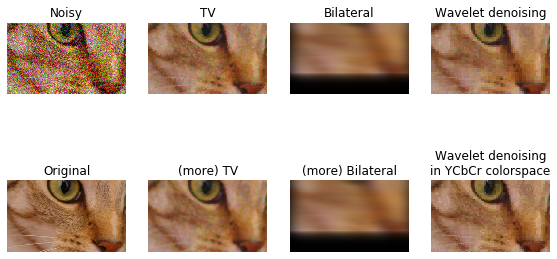

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()